In [2]:
# load the required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# set the working directory
os.chdir('E:/documents')
os.getcwd()

'E:\\documents'

In [4]:
# Read the data
df=pd.read_csv('MNIST TRAIN.csv')
df1=pd.read_csv('MNIST TEST.csv')

In [5]:
df.shape

(42000, 785)

In [6]:
df1.shape

(28000, 784)

In [7]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It is the pixel data of the images. It is obtained by applying the row transformation onto the pixel matrix

In [8]:
df.isna().any()

label       False
pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
pixel5      False
pixel6      False
pixel7      False
pixel8      False
pixel9      False
pixel10     False
pixel11     False
pixel12     False
pixel13     False
pixel14     False
pixel15     False
pixel16     False
pixel17     False
pixel18     False
pixel19     False
pixel20     False
pixel21     False
pixel22     False
pixel23     False
pixel24     False
pixel25     False
pixel26     False
pixel27     False
pixel28     False
            ...  
pixel754    False
pixel755    False
pixel756    False
pixel757    False
pixel758    False
pixel759    False
pixel760    False
pixel761    False
pixel762    False
pixel763    False
pixel764    False
pixel765    False
pixel766    False
pixel767    False
pixel768    False
pixel769    False
pixel770    False
pixel771    False
pixel772    False
pixel773    False
pixel774    False
pixel775    False
pixel776    False
pixel777    False
pixel778  

In [9]:
x_data=df.drop('label',axis=1)
y_data=df['label']

In [10]:
# split the data into train and  test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.25,random_state=3)

In [11]:
# Standardize the data 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_stan=scaler.fit_transform(x_train)

In [77]:
# Standardize the test data
x_test_stan=scaler.fit_transform(x_test)

In [12]:
x_train_stan

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
type(x_train_stan)

numpy.ndarray

In [14]:
x_tarin_stan=pd.DataFrame(x_train_stan)

we have to reduce the dimension of the data by using PCA.
I will try to visualize the higher dimensions by using the eigen values and eigen vectors concept of PCA by converting to 2 dimension

In [15]:
# PCA 
covar_matrix=np.matmul(x_train_stan.T,x_train_stan)

In [16]:
x_train_stan.shape

(31500, 784)

In [17]:
# Find the eigen values and eigen vectors
from scipy.linalg import eigh
values,vectors= eigh(covar_matrix,eigvals=(782,783))
# we have calculated the direction of vectors having high variance 

In [18]:
print('shape of the vectors : {}'.format(vectors.shape))

shape of the vectors : (784, 2)


projecting the original data sample on the plane formed by the two principle eigen vectors by vector-vector multiplication

In [19]:
vectors=vectors.T
#convert into suitable form for multiplication

In [20]:
vectors.shape

(2, 784)

In [20]:
x_train_stan.shape

(31500, 784)

In [21]:
new_coordinates=np.matmul(vectors,x_train_stan.T)
# we get 2*784 matrix

In [22]:
new_coordinates=new_coordinates.T

In [23]:
new_coordinates=pd.DataFrame(new_coordinates)

In [24]:
new_coordinates.shape

(31500, 2)

In [25]:
y_train.shape

(31500,)

In [26]:
y_train=y_train.reset_index()

In [27]:
y_train.drop('index',axis=1,inplace=True)

In [28]:
new_data=pd.concat([new_coordinates,y_train],axis=1)

In [29]:
new_data['label'].isna().any()

False

In [30]:
new_data.head()

,0,1,label
0,5.343043,5.188662,4
1,19.446410,8.565243,4
2,1.336096,-4.494308,4
3,-0.049785,-7.176846,1
4,1.394653,5.278553,4


In [31]:
new_data.columns=['1st_principle','2nd_principle','label']

In [32]:
new_data.head()

,1st_principle,2nd_principle,label
0,5.343043,5.188662,4
1,19.446410,8.565243,4
2,1.336096,-4.494308,4
3,-0.049785,-7.176846,1
4,1.394653,5.278553,4


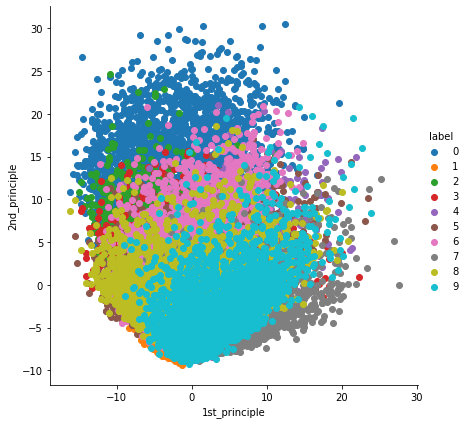

In [39]:
# plotting the 2-D data points with seaborn
sns.FacetGrid(new_data,hue='label',height=6).map(plt.scatter,'1st_principle','2nd_principle').add_legend()

from the above graph we can visualize the higher dimensional data. This is the beauty of PCA. 
Even the higher dimensional data can be converted to lower dimensions and visualize the data

In [35]:
x_train_stan.shape

(31500, 784)

In [33]:
# Finding the vectors having more variance using PCA 
from sklearn.decomposition import PCA
pca=PCA(n_components=784)
pca_data=pca.fit_transform(x_train_stan)

In [37]:
# percentage of variance explained by each vector
perc_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)

In [38]:
# cumulative percentage of variance explained by vectors
cum_var_explained=np.cumsum(perc_var_explained)

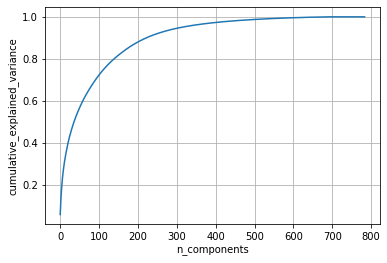

In [39]:
# plot the PCA spectrum
plt.figure(figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_variance')
plt.show()

We can see that almost 95% of variance is explained by 300 components.so we can use only 300 components to build the model.

In [34]:
# Extracting top 300 principle componenets
pca1=PCA(n_components=300)
pca1_data=pca1.fit_transform(x_train_stan)

In [35]:
type(pca1_data)

numpy.ndarray

In [36]:
pca1_data=pd.DataFrame(pca1_data)

KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=2).fit(pca1_data,y_train['label'])

In [87]:
knn_predict=knn_model.predict(pca2_data)

XGBOOST

In [38]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(pca1_data,y_train['label'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
x_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
18193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
x_test=x_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [54]:
y_test=pd.DataFrame(y_test)

In [81]:
x_test_stan=pd.DataFrame(x_test_stan)

In [82]:
#convert the test data using PCA
pca2=PCA(n_components=300)
pca2_data=pca2.fit_transform(x_test_stan)

In [83]:
pca2_data=pd.DataFrame(pca2_data)

In [51]:
pca2_data.columns

RangeIndex(start=0, stop=300, step=1)

In [84]:
pred=model.predict(pca2_data)

In [74]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,knn_predict)

In [85]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)

In [65]:
from sklearn.metrics import classification_report
report=classification_report(y_test,pred)

In [64]:
pred=pd.DataFrame(pred)

In [90]:
# using xgboost
accuracy_score(y_test,pred)

0.7285714285714285

In [88]:
#Using knn 
accuracy_score(y_test,knn_predict)

0.6342857142857142